In [122]:
!pip install mysql-connector
import mysql.connector
import datetime
import numpy as np
import pandas as pd
import sklearn

In [148]:
conn = mysql.connector.connect(
         user='Fomin',
         password='VvbrKYKj',
         host='imces.ru',
         port=22303,
         database='apik3')

cursor = conn.cursor()
query = ("select time, `1000`, `1005`, `1010`, `1015`, `1020`, `1030`, `1040`, `1050`, `1060` from `60000033` order by time limit 1800")
cursor.execute(query)

result = []
dates = []
for line in cursor:
    result.append(list(line[1:10]))
    dates.append(datetime.datetime.fromtimestamp(line[0]).date())

res = np.array(result)
dates = np.array(dates)

conn.close()

In [149]:
temp = []
means = []
i = 0
while i < len(res)-1:
    date = dates[i]
    temp.append(list(res[i]))
    i += 1
    while dates[i] == date:
        temp.append(list(res[i]))
        i += 1
        if i == len(res):
            break

    temp = np.array(temp)
    temp_frame = pd.DataFrame(data=temp, dtype=np.float)

    mean_t = temp_frame.describe(include='all').as_matrix()[1]
    means.append(mean_t)
    
    temp = []

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [150]:
means = np.array(means).transpose()

In [151]:
mean = means[8]
mean1= means[0]

In [152]:
# для глубины 60 см
y = mean
x = np.array([i for i in range(len(y))]).reshape((-1, 1))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

model=LinearRegression()
model.fit(x_train, y_train)
print('R^2 = ', format(model.score(x_train,y_train)))

R^2 =  0.9462921603994551


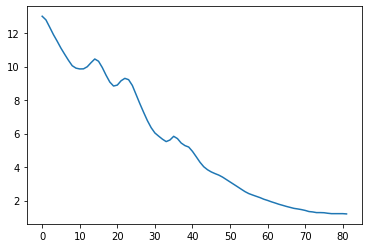

In [153]:
#распределение температуры на максимальной глубине 60 см по дням
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

ax.plot(x, y)

In [154]:
# для глубины 0 см
y = mean1
x = np.array([i for i in range(len(y))]).reshape((-1, 1))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

model=LinearRegression()
model.fit(x_train, y_train)
print('R^2 = ', format(model.score(x_train,y_train)))

R^2 =  0.5668141414677867


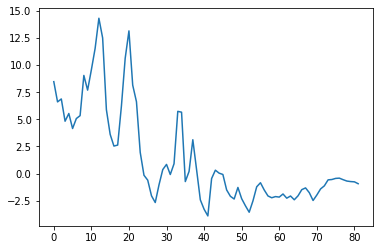

In [155]:
#распределение температуры на минимальной глубине 0 см по дням
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

ax.plot(x, y)

In [159]:
print("Взят промежуток времени : " + str(dates[0]) + " - " + str(dates[len(dates)-1]))

Взят промежуток времени : 2019-09-25 - 2019-12-15
